In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataframe.
df_softlabel = pd.read_csv('softlabel_dataset.csv')

# Define the soft label columns.
soft_label_cols = [
    'soft_anger',
    'soft_contempt',
    'soft_disgust',
    'soft_fear',
    'soft_happy',
    'soft_neutral',
    'soft_sad',
    'soft_surprise',
]

# Calculate descriptive statistics for the soft label columns.
df_descriptive_stats = df_softlabel[soft_label_cols].describe()

# Transpose for better readability in the final output.
df_descriptive_stats = df_descriptive_stats.T

print('Overall soft label descriptive statistics:')
print(df_descriptive_stats.to_markdown())

Overall soft label descriptive statistics:
|               |   count |      mean |      std |   min |   25% |   50% |       75% |   max |
|:--------------|--------:|----------:|---------:|------:|------:|------:|----------:|------:|
| soft_anger    |    8394 | 0.0974903 | 0.176625 |     0 |     0 |     0 | 0.166667  |   0.5 |
| soft_contempt |    8394 | 0.0584942 | 0.105975 |     0 |     0 |     0 | 0.1       |   0.3 |
| soft_disgust  |    8394 | 0.0389961 | 0.07065  |     0 |     0 |     0 | 0.0666667 |   0.2 |
| soft_fear     |    8394 | 0.14477   | 0.207143 |     0 |     0 |     0 | 0.333333  |   1   |
| soft_happy    |    8394 | 0.256612  | 0.42667  |     0 |     0 |     0 | 0.666667  |   1   |
| soft_neutral  |    8394 | 0.0462632 | 0.152004 |     0 |     0 |     0 | 0         |   1   |
| soft_sad      |    8394 | 0.242197  | 0.378114 |     0 |     0 |     0 | 0.333333  |   1   |
| soft_surprise |    8394 | 0.115178  | 0.210803 |     0 |     0 |     0 | 0.2       |   0.6 |


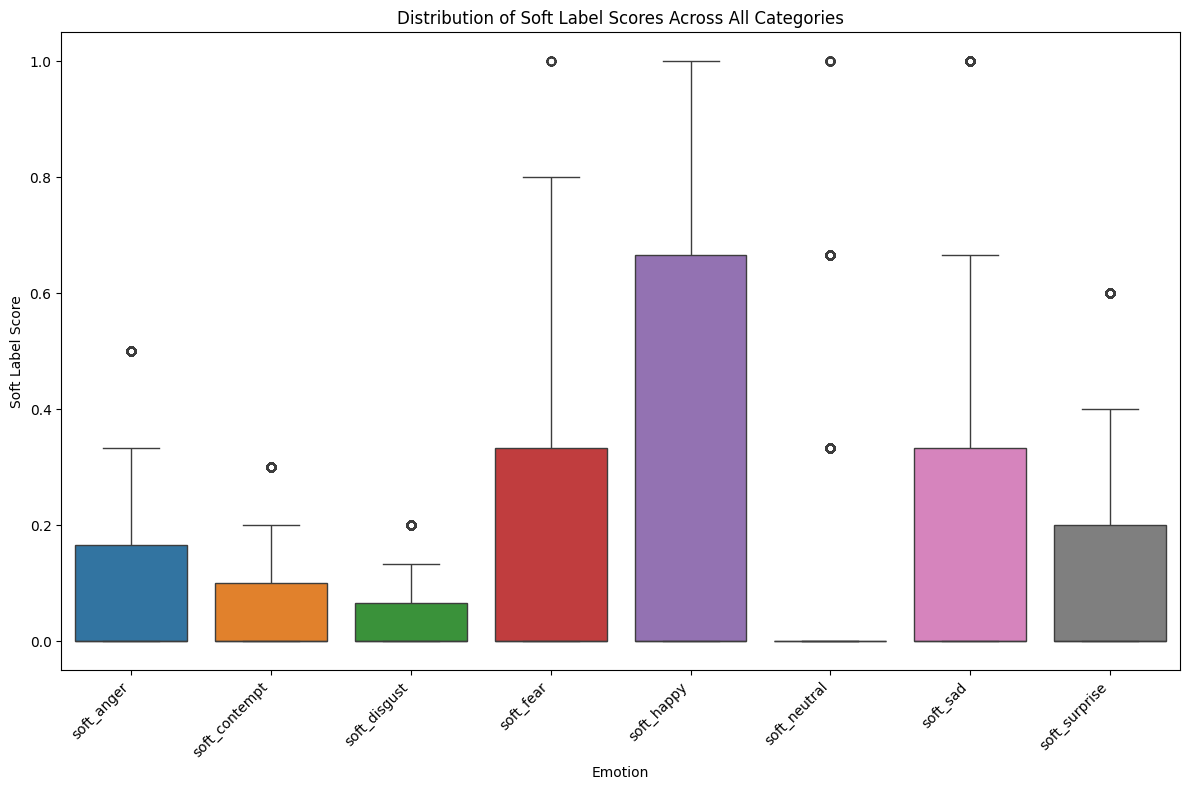

In [3]:
# Create a box plot to visualize the distribution of soft label scores.
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_softlabel[soft_label_cols])
plt.title('Distribution of Soft Label Scores Across All Categories')
plt.xlabel('Emotion')
plt.ylabel('Soft Label Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# plt.savefig('05. overall_soft_label_boxplot.png')
# print("Box plot saved as '05. overall_soft_label_boxplot.png'")

Histograms with counts saved as '05. soft_label_histograms_with_counts.png'


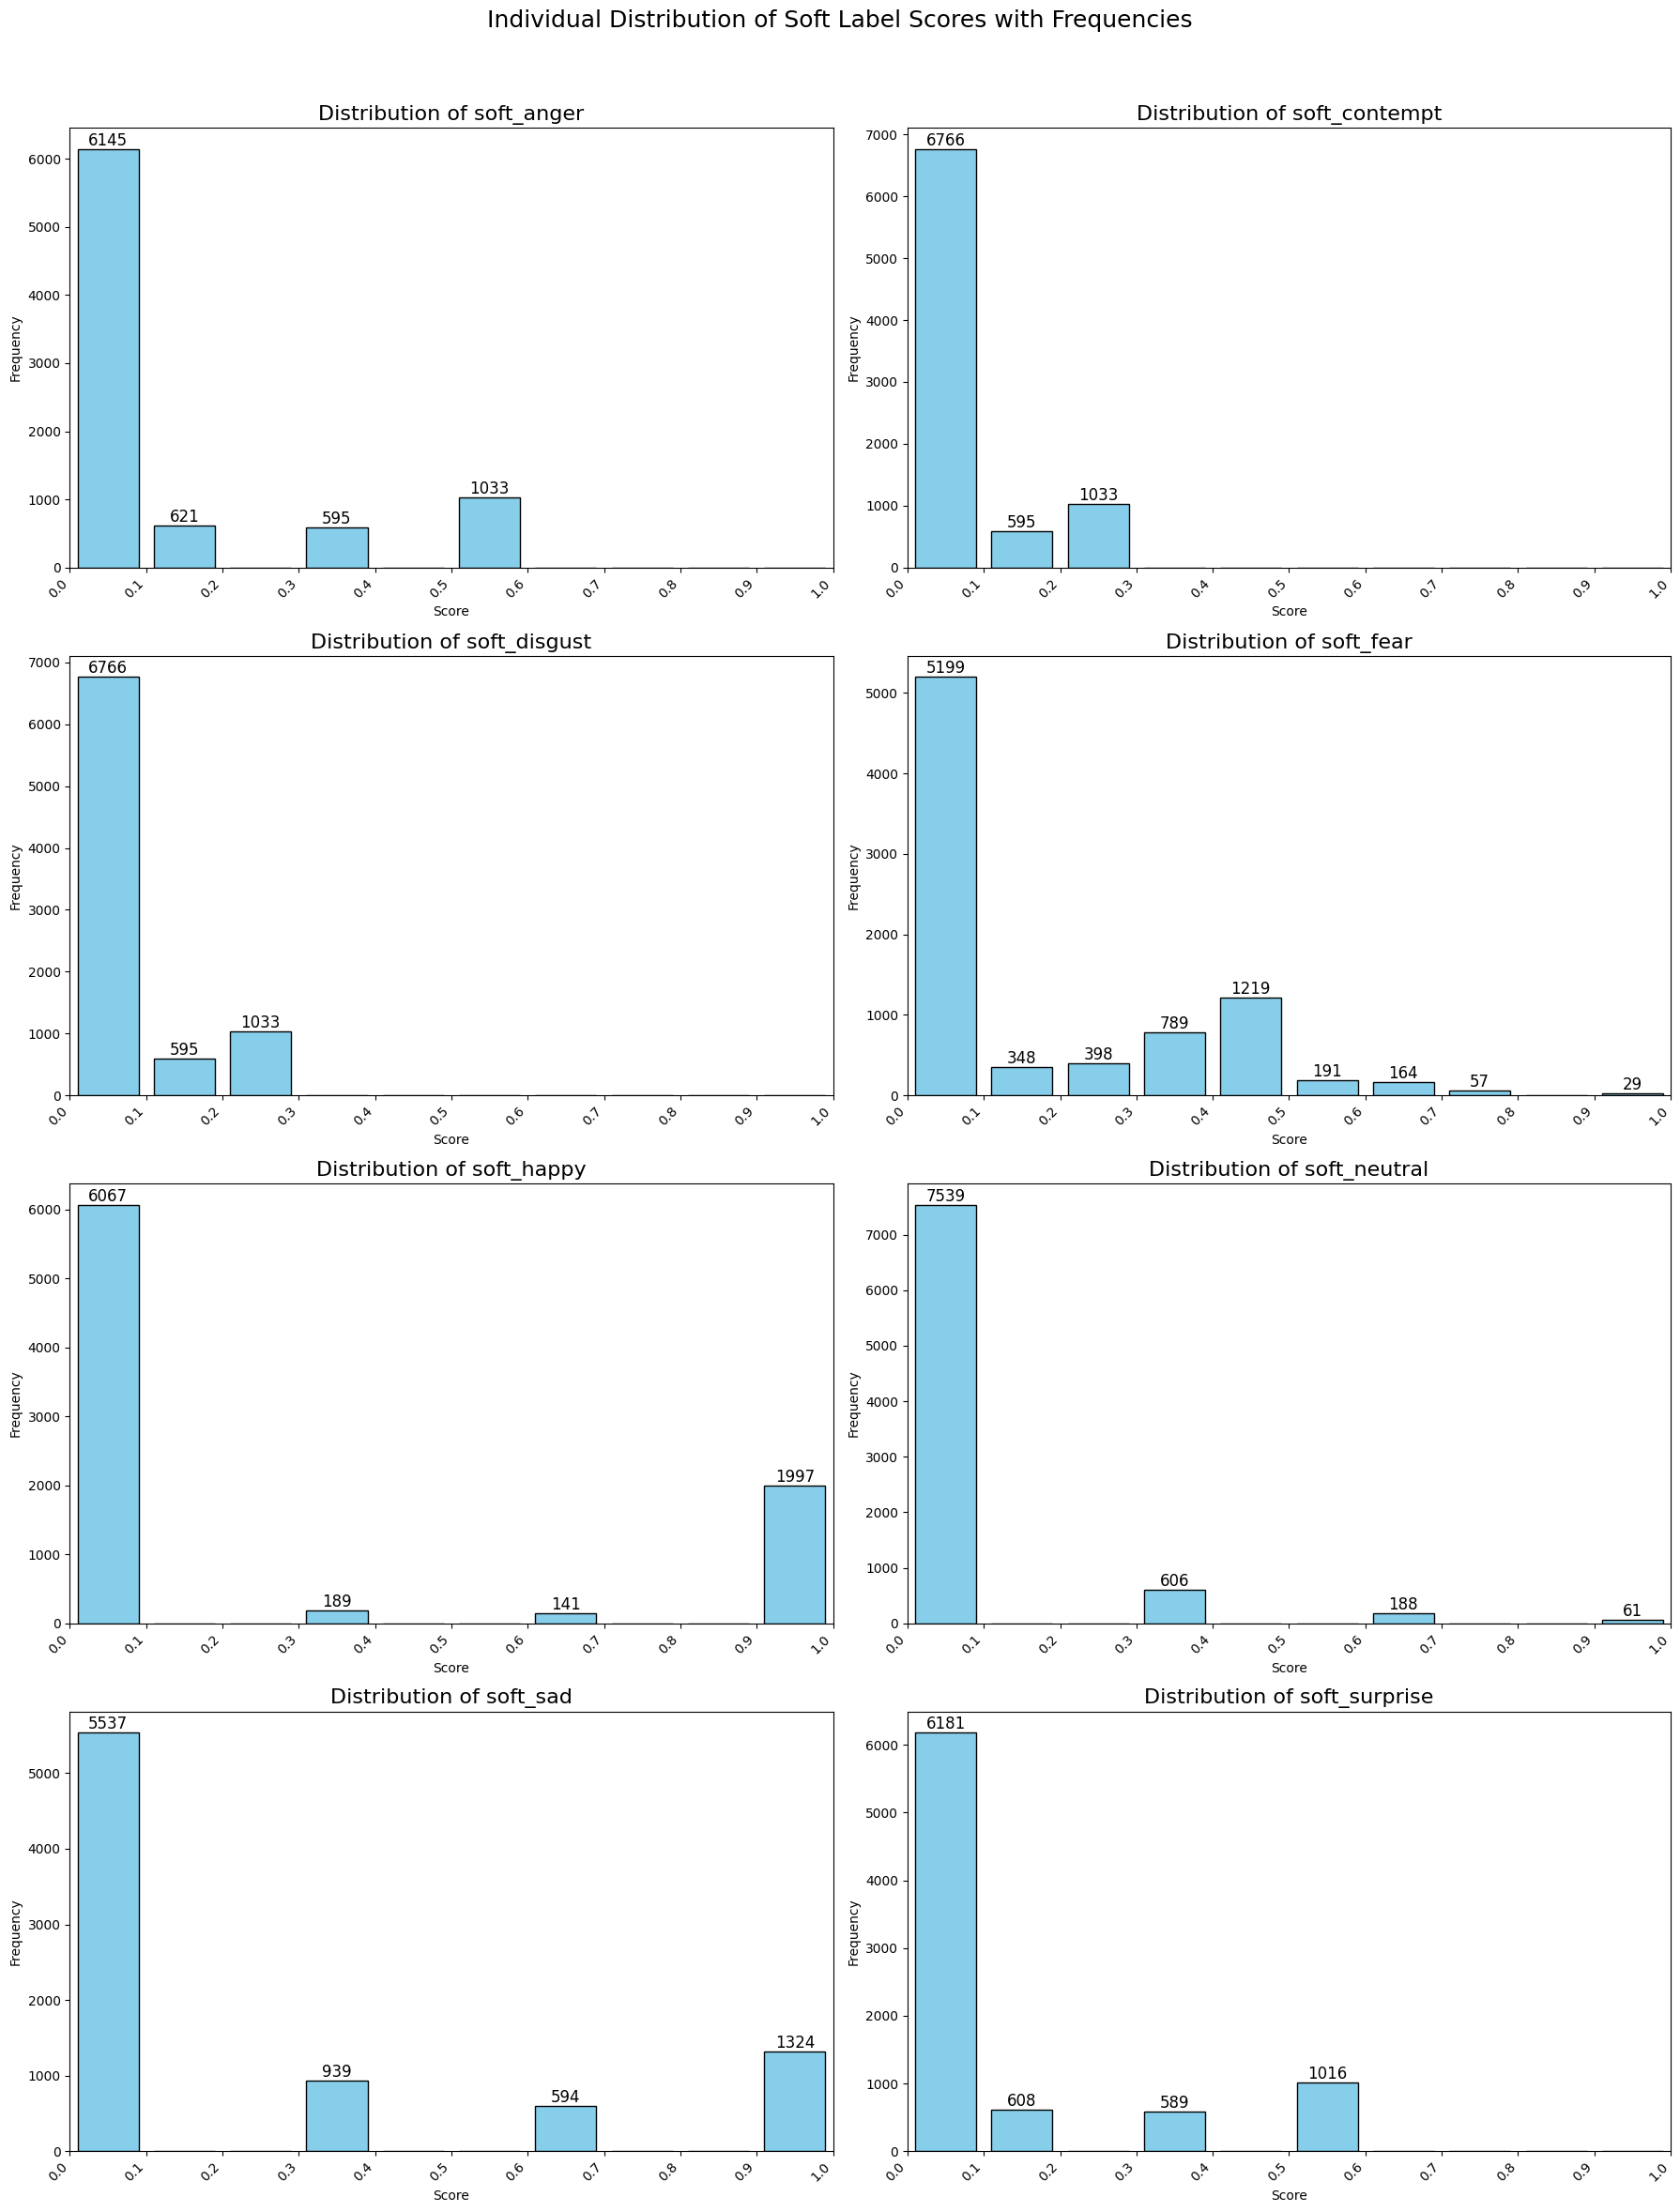

In [7]:
# Set up the matplotlib figure and subplots.
fig, axes = plt.subplots(4, 2, figsize=(18, 24))
fig.suptitle('Individual Distribution of Soft Label Scores with Frequencies', fontsize=18)
axes = axes.flatten()

# Plot a histogram with counts on bars for each soft label column.
for i, col in enumerate(soft_label_cols):
    ax = axes[i]

    # Calculate histogram data with specific bins from 0 to 1.
    bins = np.linspace(0, 1, num=11)
    counts, _ = np.histogram(df_softlabel[col], bins=bins)

    # Plot the histogram.
    ax.hist(df_softlabel[col], bins=bins, rwidth=0.8, color='skyblue', edgecolor='black')

    # Add text labels on each bar.
    for count, rect in zip(counts, ax.patches):
        if count > 0:
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_height(),
                f'{int(count)}',
                ha='center',
                va='bottom',
                fontsize=12
            )

    # Set titles, labels, and axis limits.
    ax.set_title(f'Distribution of {col}', fontsize=16)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.set_xticks(bins)
    ax.set_xticklabels([f'{x:.1f}' for x in bins], rotation=45, ha='right')
    ax.set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('05. soft_label_histograms_with_counts.png')
print("Histograms with counts saved as '05. soft_label_histograms_with_counts.png'")